## Prevendo doenças cardíacas com Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_cardio = pd.read_csv("cardio_train.csv", sep=",", index_col=0)

## 1. Análise geral dos dados

| Feature                                       | Variable Type       | Variable    | Value Type                                       |   |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|---|
| Age                                           | Objective Feature   | age         | int (days)                                       |   |
| Height                                        | Objective Feature   | height      | int (cm)                                         |   |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |   |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |   |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |   |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |   |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |   |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |   |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |   |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |   |
| Physical activity                             | Subjective Feature  | active      | binary                                           |   |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |   |

In [3]:
df_cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [5]:
df_cardio.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [6]:
df_cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 2. Análise exploratória dos dados (EDA)

In [7]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### 2.1. Dados numéricos

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=4, col=1)

fig.update_layout(template="plotly_dark", height=700)
fig.show()

### 1.2. Dados categóricos

In [9]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Feminino", "Masculino"], name="Genero"), row=1, col=1)
fig.add_trace(go.Bar(y=df_cardio["cholesterol"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_cardio["gluc"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_cardio["smoke"].value_counts(), x=["Não fumante", "Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=df_cardio["alco"].value_counts(), x=["Não Alcoólatra", "Alcoólatra"], name="Alcoólatra"), row=2, col=2)
fig.add_trace(go.Bar(y=df_cardio["active"].value_counts(), x=["Não Ativo", "Ativo"], name="Ativo"), row=2, col=3)

fig.update_layout(template="plotly_dark", height=700)
fig.show()

## 3. Machine Learning

### 3.1. Preparação dos dados

In [10]:
Y = df_cardio["cardio"]
X = df_cardio.loc[:, df_cardio.columns != 'cardio']

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
x_train

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
64334  91821  21968       2     156    60.0    200   1200            1     1   
4550    6439  20280       1     159    60.0    120     80            1     1   
24098  34438  20411       2     170    90.0    145     90            2     1   
34222  48898  16767       1     160   105.0    130     80            1     1   
36016  51423  19933       2     176    94.0    140     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
37194  53137  16001       2     170    75.0    150     80            1     1   
6265    8918  23209       2     162    73.0    160     90            1     1   
54886  78302  23589       1     169    74.0    120     80            1     1   
860     1197  18227       1     167    70.0    120     80            1     1   
15795  22556  15114       2     177    64.0    120     80            1     1   

       smoke  alco  active  
64334      0     0       1  
4550       0     0       0  
24098      0     0       1  
34222      0     0       0  
36016      0     0       0  
...      ...   ...     ...  
37194      1     0       1  
6265       0     0       1  
54886      0     0       1  
860        0     0       0  
15795      0     0       1  

[46900 rows x 12 columns]

### 3.2. Treinamento do modelo

In [13]:
from sklearn.ensemble import RandomForestClassifier


ml_model = RandomForestClassifier(n_estimators=20, n_jobs=4, max_depth=4, )
ml_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=4)

In [14]:
x_test.iloc[0].to_frame().transpose()

id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
46730  66728.0  21770.0     1.0   156.0    64.0  140.0   80.0          2.0   

       gluc  smoke  alco  active  
46730   1.0    0.0   0.0     1.0

In [15]:
ml_model.predict_proba(x_test.iloc[0].to_frame().transpose())[0][1] * 100

61.300885846225185

In [16]:
predictions = ml_model.predict(x_test)

### 3.3. Avaliação do modelo

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75     11506
           1       0.78      0.65      0.71     11594

    accuracy                           0.73     23100
   macro avg       0.74      0.73      0.73     23100
weighted avg       0.74      0.73      0.73     23100

[[9394 2112]
 [4094 7500]]


### 3.4. Feature importance

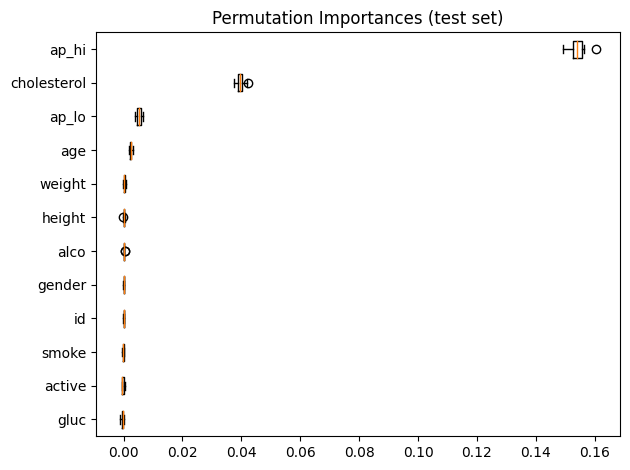

In [18]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ml_model, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [19]:
# !pip install shap
import shap
explainer = shap.TreeExplainer(ml_model)

In [20]:
shap_values = explainer.shap_values(X)

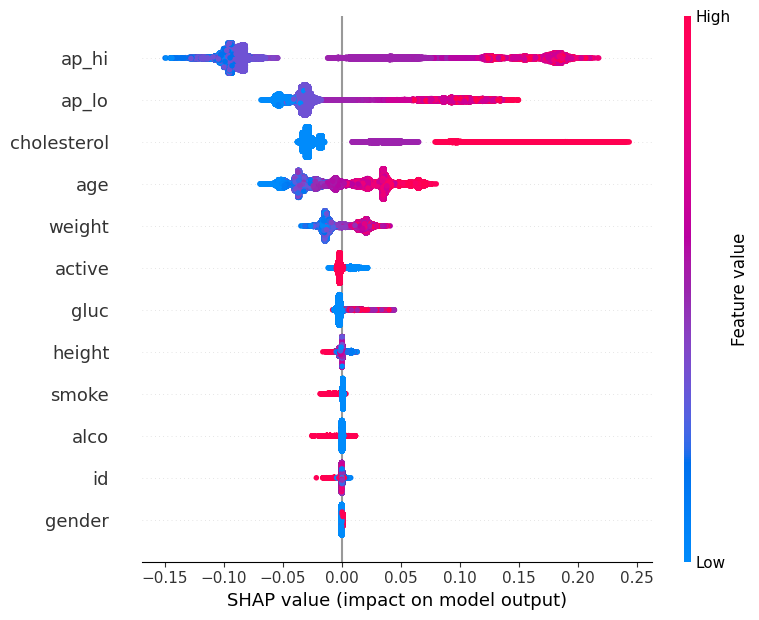

In [21]:
shap.summary_plot(shap_values[:, :, 1], X)